# Assignment 6 - Instructions

Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:
A)
i)The temperature  
ii)The mean temperature each day  
iii)The mean temperature for each month  
60% of the marks will be given for the above  

For the last 40%

Plot:
B)
i)The Windspeed (there is data missing from this column)  
ii)The rolling windspeed (say over 24 hours)  
iii)The max windspeed for each day  
iv) The monthly mean of the daily max windspeeds (yer I am being nasty here)  

*You do not need to over comment your code. Marks will be given for how nice the plots are.*

In [35]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_2053/1496826734.py:6: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
/tmp/ipykernel_2053/1496826734.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


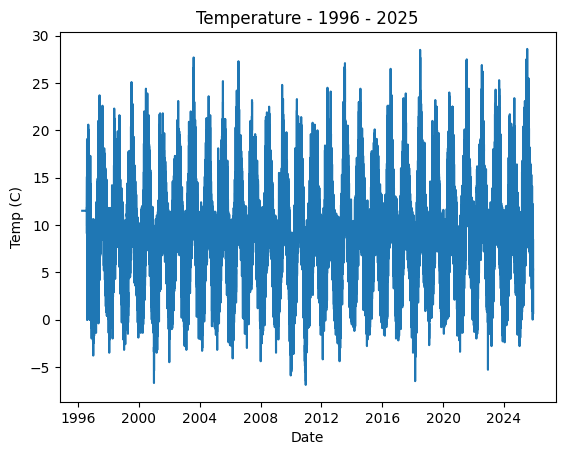

In [36]:
# A)
# i) Plot the temperature

# Read in Data
# Skip first 23 rows to access data
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)
#df.head(25)

# Check datatype of 'wdsp' column
#df['temp'].dtype

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
# Set 'date' column as index
df.set_index('date', inplace=True)

# Plot the temperature data
sns.lineplot(data=df, x=df.index, y="temp") # REF: https://seaborn.pydata.org/generated/seaborn.lineplot.html
plt.title("Temperature - 1996 - 2025")
plt.xlabel("Date")
plt.ylabel("Temp (C)") # Unit from dataset documentation
plt.show()




In [37]:
# A)
# ii) Plot the mean temperature each day

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set the date column as the index per Lecture notes
# https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/code/Topic06-dates/L2-Timeseries%20in%20pandas.ipynb

df.set_index('date',inplace=True)

# Will get the daily average temperature & plot this
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

df_daily_temp = df.resample("D").mean(numeric_only=True) # 'D' = daily frequency

# can't use 'date' as x index as used as index & no longer a column
sns.lineplot(data=df_daily_temp, x=df_daily_temp.index, y="temp")

plt.title("Daily Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.show()




KeyError: 'date'

In [ ]:
# Check columns in df
df.columns

Index(['ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun',
       'vis', 'clht', 'clamt'],
      dtype='object')

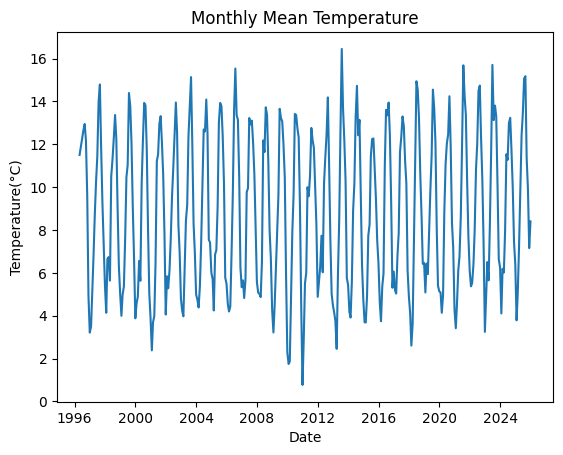

In [ ]:
# A)
# iii) Plot the mean temperature for each month

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

df_monthly_temp = df.resample("ME").mean(numeric_only=True) # 'ME' = month end frequency

# can't use date as x index as used as index & no longer a column
sns.lineplot(data=df_monthly_temp, x=df_monthly_temp.index, y="temp")

plt.title("Monthly Mean Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature(°C)")
plt.show()

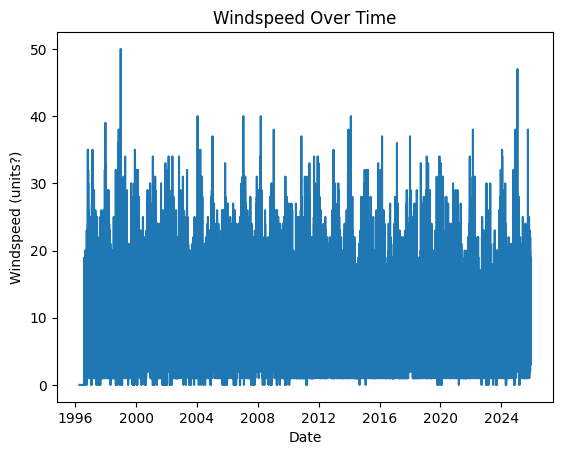

In [ ]:

#B)
#i)The Windspeed (there is data missing from this column)

# Refeered to lecture notes on cleaning data
# Clean data due to missing data in 'wdsp' column
# Create a new dataframe with only the 'wdsp' column - warning when originally sliced
cleandf = df[["wdsp"]].copy()

# Clean 'wdsp' column & drop NaN values
cleandf['wdsp']= cleandf.loc[:,('wdsp')].replace(' ', np.nan)
cleandf.dropna(inplace=True)

# Check datatype of 'wdsp' column
#cleandf['wdsp'].dtype

# Convert 'wdsp' column to float
cleandf['wdsp'] = cleandf['wdsp'].astype(float)
#print(cleandf.head(25))

# Plot the windspeed
sns.lineplot(data=cleandf, x=cleandf.index, y="wdsp")
plt.title("Windspeed - 1996 - 2025")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)") # Unit from dataset documentation
plt.show()


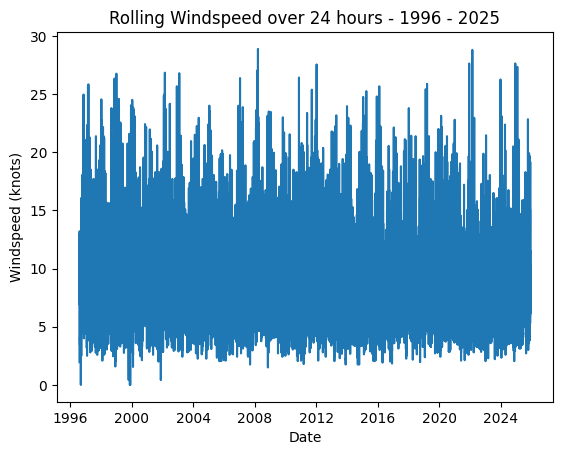

In [ ]:
#B)
#ii)The rolling windspeed (say over 24 hours)

# Calculate rolling windspeed over 24 hours
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html
rolling_wind = cleandf['wdsp'].rolling(window=24).mean()    
# Plot the rolling windspeed
sns.lineplot(x=rolling_wind.index, y=rolling_wind) # REF - https://seaborn.pydata.org/generated/seaborn.lineplot.html - data not required when passing x & y directly and not a dataframe
plt.title("Rolling Windspeed over 24 hours - 1996 - 2025")
plt.xlabel("Date")
plt.ylabel("Windspeed (knots)") # Unit from dataset documentation
plt.show()